## **Understand and Implementation of ``BOOTSTRAP`` Simulation** 

In [1]:
import os
import sys
import logging

logging.basicConfig(filename="Resampling_and_Bootstrapping.log",
                    filemode='w',
                    level=logging.INFO,
                    format="%(asctime)s : %(levelname)s : %(message)s")

try :
    logging.info("#### Start packages import ####")
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
except ModuleNotFoundError as import_error:
    logging.error(msg=(import_error.__class__.__name__ + " :: {} not found".format(import_error.name)))

%matplotlib inline

### **Population Dataset**

In [35]:
np.random.seed(44)
pop_scores = np.random.randint(low=0,high=400,size=500,dtype=np.int)

In [36]:
pop_scores

array([276, 241, 173,  59, 387,  96,  84, 387, 239, 120, 151, 311, 195,
       199,  67, 227, 109, 245, 100,  57, 257,  14, 120, 359, 349, 213,
       339,  96, 330, 287,  72, 189,  72, 330,  86, 378, 242, 144, 116,
       328,  50,  18,  92, 285,   1,  63, 140, 386,  66, 312, 305,   8,
       233, 164,  34,  10, 379, 116, 119,  53,  21, 306, 315, 373, 209,
       123, 235, 255, 399, 220, 104, 249,  40,  74, 352, 249, 227,  62,
       101,  25,  21, 384,  72,  42, 132, 334, 354, 255, 121,  31, 247,
        22, 141, 222, 178, 197, 272,   4, 267, 296, 347,  40, 164, 194,
       210, 353, 234, 374, 158, 188, 334, 121,  99, 147,  75, 332, 167,
       389, 177, 346, 126,  29, 180, 198, 184, 312,   0, 229, 327, 271,
       315, 297, 177, 305, 311, 385, 112, 368, 198,  89, 214, 138, 180,
        80,  53, 100, 226, 260,  89, 215, 127, 138, 199,  99, 118, 248,
       128, 150,  26, 170, 379,  70, 255,  31,  31, 371, 200,  10, 373,
       209, 364, 130, 357,  27, 148, 104, 337, 362, 340, 123, 12

In [37]:
## Population Score mean
np.mean(pop_scores)

201.02

In [38]:
## Population Score Variance
np.var(pop_scores,ddof=0)

14494.1916

In [39]:
## Population Score Std Dev
np.std(pop_scores,ddof=0)

120.39182530388017

### **Sample-1 from Population**

In [40]:
sample1 = np.random.choice(a=pop_scores,size=50,replace=True)

In [59]:
## Parent Sample Scores Mean
np.mean(sample1)

191.86

In [42]:
## Parent Sample Score Var
np.var(sample1,ddof=1)

16738.898367346937

In [43]:
## Parent Sample Score Std Dev
samp1_std = np.std(sample1,ddof=1)
samp1_std

129.37889459779342

In [44]:
## Standard Error
samp1_std_err = samp1_std / (np.sqrt(40))
samp1_std_err

20.456599404194076

### **Here, the point estimate(usually referred as sample mean) is 192 and the standard error is 20. Therefore, we are saying that the population mean will lie in the interval (172,212).**

### **BOOTSTRAPPING Simulation**

In [154]:
bootsample_means = []
for _ in range(10000):
    bootsample = np.random.choice(a=sample1,size=40,replace=True)
    bootsample_means.append(np.mean(bootsample))

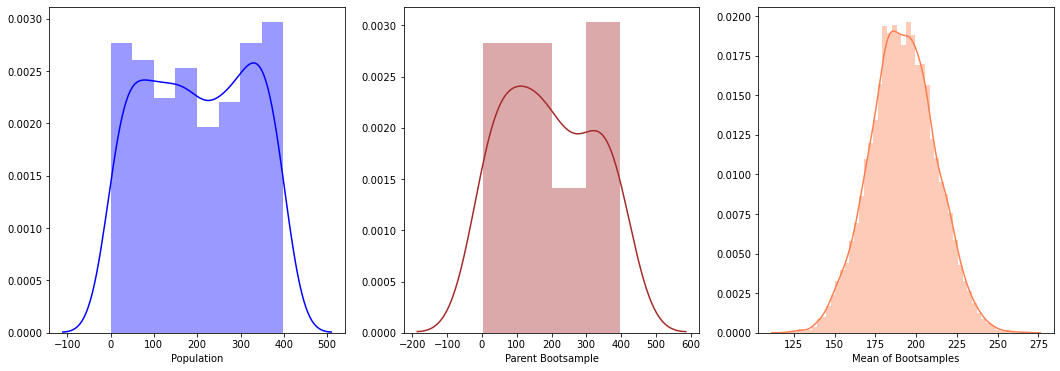

In [155]:
with plt.style.context('seaborn-bright'):
    fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6))
    sns.distplot(pop_scores,ax=ax[0],axlabel='Population',color='blue')
    sns.distplot(sample1,ax=ax[1],axlabel='Parent Bootsample',color='brown')
    sns.distplot(bootsample_means,ax=ax[2],axlabel='Mean of Bootsamples',color='coral')
    plt.show()

In [156]:
from statsmodels.graphics.gofplots import qqplot

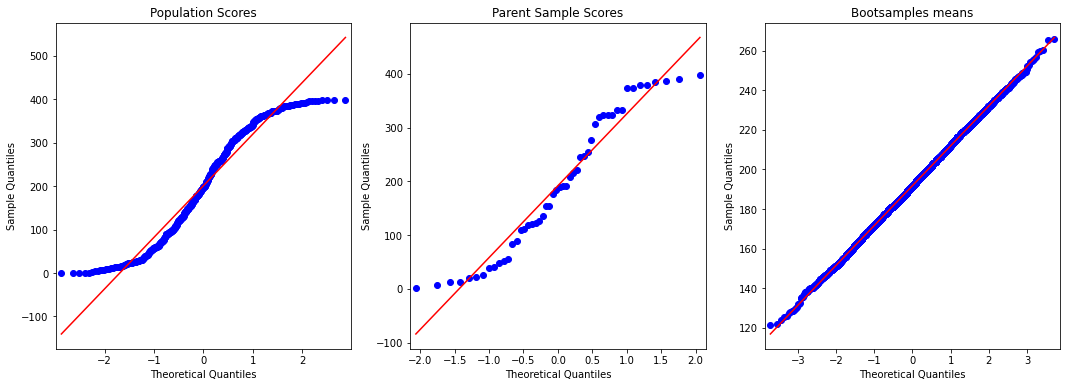

In [157]:
with plt.style.context('seaborn-bright'):
    fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6))
    qqplot(data=np.array(pop_scores),line='r',ax=ax[0]);
    ax[0].set_title('Population Scores')
    
    qqplot(data=np.array(sample1),line='r',ax=ax[1]);
    ax[1].set_title('Parent Sample Scores')
    
    qqplot(data=np.array(bootsample_means),line='r',ax=ax[2]);
    ax[2].set_title('Bootsamples means')

### **Here, we saw that by using the computational power we can create a normally distributed data from a small size sample.**

In [158]:
## Mean of Bootsample means
np.mean(bootsample_means)

191.766285

In [159]:
## Std Dev of Bootsamples Means
np.std(bootsample_means)

20.13668524233259

In [160]:
## True Mean v/s Simulated Mean
np.mean(pop_scores), np.mean(bootsample_means)

(201.02, 191.766285)

In [161]:
## Theoretical Error v/s Simulated Std Error
np.std(pop_scores)/np.sqrt(40), np.std(bootsample_means)

(19.03561898126772, 20.13668524233259)

### **P-value**

In [162]:
len(list(filter(lambda val : val > np.mean(sample1), bootsample_means)))/10000

0.4958

### **This means that 50% of the times the value of Simulated Sample mean is greater than the parent sample mean.**

#### **Forming the confidence intervals**

In [163]:
loc = 0.95
alpha_lower = np.round(((1-loc)/2.0)*100,2)
lower = np.percentile(bootsample_means,alpha_lower)

In [164]:
alpha_upper = np.round((loc+(alpha_lower)/100)*100,2)
upper = np.percentile(bootsample_means,alpha_upper)

In [165]:
print(alpha_lower,alpha_upper)

2.5 97.5


In [168]:
print("Confidence interval is ({},{})".format(np.round(lower,3),np.round(upper,3)))

Confidence interval is (151.8,231.101)


### **Above is the percentile-method of finding the confidence intervals based on the value of loc(level of confidence) or alpha. Other method to construct the C.I. is using Z-score table also referred as normal method.**

## **``Now, the remaining section here is the model comparisons using Bootstrapping``**

## Refer video:
- https://www.youtube.com/watch?v=JmBwrYvKdtg
- https://analyticsindiamag.com/hands-on-guide-to-bootstrap-sampling-for-ml-performance-evaluation/
- https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/

## **Model Comparisons**

In [171]:
from sklearn import datasets

In [175]:
iris = datasets.load_iris()
print(datasets.load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [177]:
iris_df = pd.concat([pd.DataFrame(iris.data,columns=iris.feature_names),
                     pd.DataFrame(iris.target,columns=['Label'])],axis=1)

In [181]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [182]:
iris_df['Label'].value_counts()

2    50
1    50
0    50
Name: Label, dtype: int64

### **Usually this technique is used at the end of machine learning analysis to be able to quantify statistically the performance of the classifier over a range of metrics. This means that I've already done my ``nested cross validation`` with model selection and pinpointed the best model. Let's assume that model is Random Forest Classifier. Now, I'll create different test datasets using Bootstrapping and fed in to RF to generate an array of the performance metric(or range of metrics) on simulated test data samples.**

### **The cool thing with this method is that you can compare the best classifier trained on different condition (e.g. on a different type of input feature, but with a similar classification problem) and compare them statistically.**

### **The bootstrap confidence interval along with permutation testing are the go to tools for post ml analysis.**

In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import pipeline

In [187]:
X = iris_df.iloc[:,0:-1]
y = iris_df['Label']

In [194]:
X.shape

(150, 4)

In [237]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.30, random_state=23)

In [238]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [239]:
p = pipeline.make_pipeline(StandardScaler(), RFC())
p

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [240]:
p.fit(X=X_train,y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [241]:
X_train = StandardScaler().fit_transform(X=X_train)

## **Model-1 :: RFC**

In [242]:
rfc = RFC()

In [243]:
rfc_model = rfc.fit(X_train,y_train)

In [244]:
rfc_model.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [245]:
np.array(y_test)

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0,
       1])

In [218]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score as acc_scr

In [270]:
X_test_score = acc_scr(y_test,rfc_model.predict(X_test))
X_test_score

0.28888888888888886

In [248]:
bt_tst_smpl_acc = []
for _ in range(5000):
    boot_testsample = resample(pd.concat([X_test,y_test],axis=1).values,n_samples=45)
    mod_pred = rfc_model.predict(boot_testsample[:,:-1])
    score = acc_scr(boot_testsample[:,-1],mod_pred)
    bt_tst_smpl_acc.append(score)

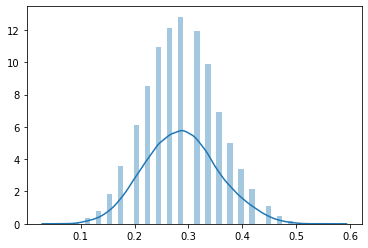

In [249]:
sns.distplot(bt_tst_smpl_acc);

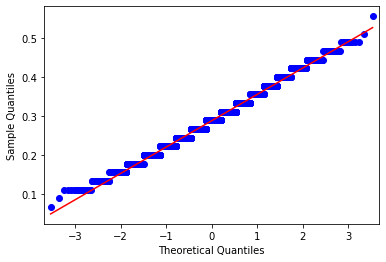

In [251]:
qqplot(np.array(bt_tst_smpl_acc),line='r');

In [252]:
np.mean(bt_tst_smpl_acc)

0.2876444444444444

In [268]:
mod1_lower = np.percentile(bt_tst_smpl_acc,2.5)
mod1_upper = np.percentile(bt_tst_smpl_acc,97.5)
mod1_lower,mod1_upper

(0.15555555555555556, 0.4222222222222222)

### **P-value**

In [271]:
len(list(filter(lambda val : val > X_test_score, bt_tst_smpl_acc)))/5000

0.4186

## **Model-2 :: GBC**

In [262]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
gbc = GBC(n_estimators=100)
gbc_model = gbc.fit(X_train,y_train)
bt_tst_smpl_acc2 = []
for _ in range(5000):
    boot_testsample = resample(pd.concat([X_test,y_test],axis=1).values,n_samples=45)
    mod2_pred = gbc_model.predict(boot_testsample[:,:-1])
    score = acc_scr(boot_testsample[:,-1],mod2_pred)
    bt_tst_smpl_acc2.append(score)

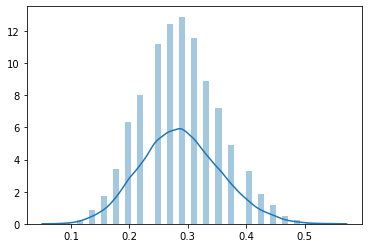

In [263]:
sns.distplot(bt_tst_smpl_acc2);

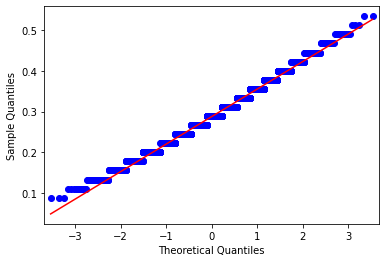

In [264]:
qqplot(np.array(bt_tst_smpl_acc2),line='r');

In [265]:
np.mean(bt_tst_smpl_acc2)

0.28742666666666666

In [266]:
mod2_lower = np.percentile(bt_tst_smpl_acc2,2.5)
mod2_upper = np.percentile(bt_tst_smpl_acc2,97.5)
mod2_lower,mod2_upper

(0.15555555555555556, 0.4222222222222222)

### **P-value**

In [272]:
len(list(filter(lambda val : val > X_test_score, bt_tst_smpl_acc2)))/5000

0.4102

### **The values of both the models are very close thus we can say that they are behaving same on this dataset.**